Carlos Patricio Castañeda Bustamante
Machine Learning / Proyecto guiado End to End
Universidad Autonoma de Chihuahua
Maestria en Ingenieria en Computacion

In [149]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from joblib import dump, load
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle as pkl
import sys

sys.path.append('/Volumes/TOSHIBA EXT/Maestria/Programs/Machine Learning/End-to-End Housing/')



1.- Get Data

Primero, definimos el DataFrame 'housing.csv', que contiene información sobre el valor de las viviendas basado en diversos factores, con el cual trabajaremos.


In [96]:
# Cargamos el dataset y lo guardamos en df
df = pd.read_csv('/Volumes/TOSHIBA EXT/Maestria/Programs/Machine Learning/End-to-End Housing/housing.csv')

 2.- Discover and visualize the data

 Antes de iniciar a trabajar con nuestro DataFrame, es esencial comprender su contenido para determinar la mejor manera de abordarlo.

 

In [97]:
# Verificamos el tamaño del dataset (renglones x columnas)
df.shape

(20640, 11)

In [98]:
# Revisamos los nombres de las columnas
df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [99]:
# Imprimimos las primeras 5 filas del dataset para revisar su contenido y darnos una idea de como se distribuye el dataset
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
# Imprimimos la informacion del dataset para revisar cuantos valores faltantes hay y cuales son los tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [101]:
# Imprimimos una descripción del dataset para darnos una idea de como se comportan los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20640.0,10319.500000,5958.399114,0.0000,5159.7500,10319.5000,15479.25000,20639.0000
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [102]:
# Revisamos cuantas columnas tienen valores nulos para tener una idea mas concreta
df.isnull().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [103]:
# Revisamos si hay datos duplicados
df.duplicated().sum()

0

<Axes: xlabel='median_house_value', ylabel='Count'>

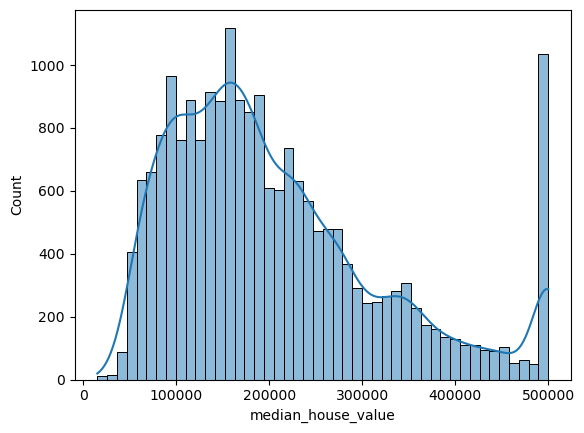

In [104]:
# Imprimimos un histograma de la variable 'median_house_value' para revisar la distribución de los datos
sns.histplot(df['median_house_value'], kde=True)

<Axes: xlabel='housing_median_age', ylabel='Count'>

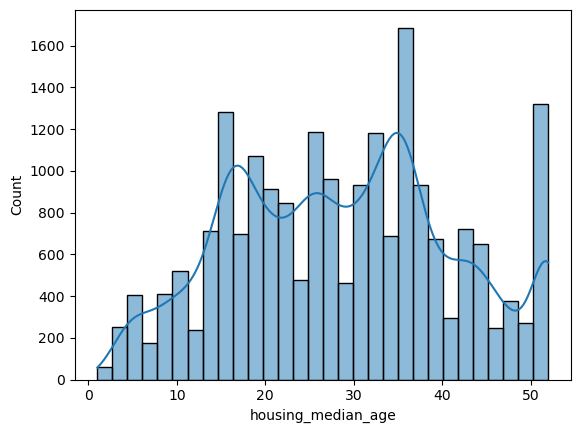

In [105]:
# Imprimimos un histograma de la variable 'housing_median_age' para revisar la distribución de los datos
sns.histplot(df['housing_median_age'], kde=True, bins=30)

<Axes: xlabel='longitude', ylabel='latitude'>

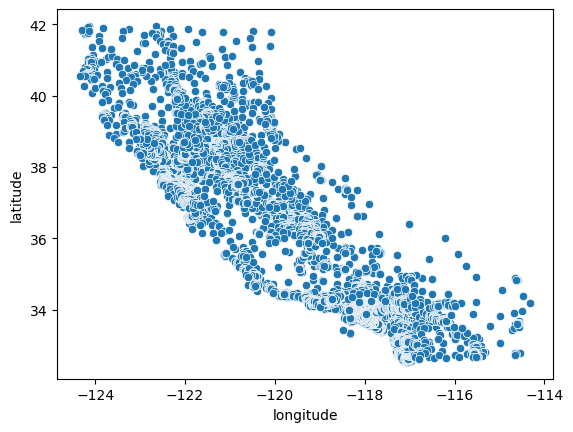

In [106]:
# Imprimimos un scatterplot de la variable 'longitude' y 'latitude' para darnos una idea de la distribución de las casas
sns.scatterplot(data = df, x = 'longitude', y = 'latitude')

/var/folders/bs/2tfzn10x6jl89d57bc7g9kph0000gn/T/ipykernel_60957/3934027463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

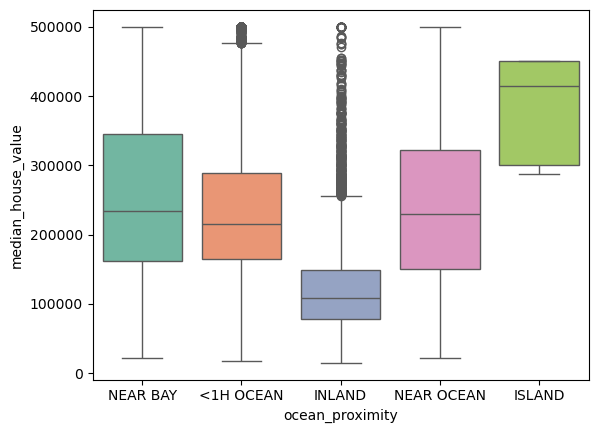

In [107]:
# Imprimimos un boxplot de la variable 'ocean_proximity' para revisar la distribución del precio acorde a la proximidad al oceano
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')

<Axes: xlabel='median_income', ylabel='median_house_value'>

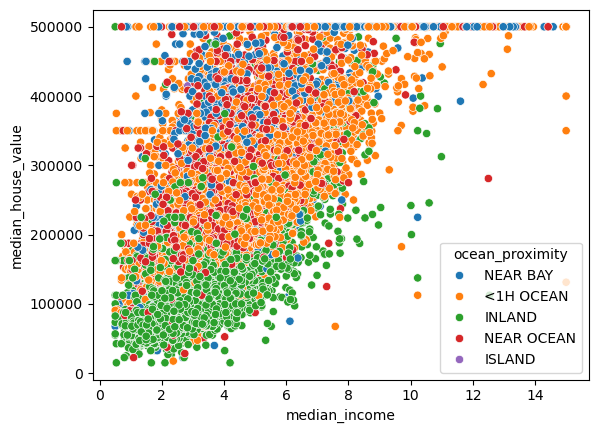

In [108]:
# Imprimimos un scatterplot de la variable 'median_income' y 'median_house_value' y las separamos por proximidad al oceano para ver la correlación 
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue = 'ocean_proximity')

<Axes: xlabel='longitude', ylabel='latitude'>

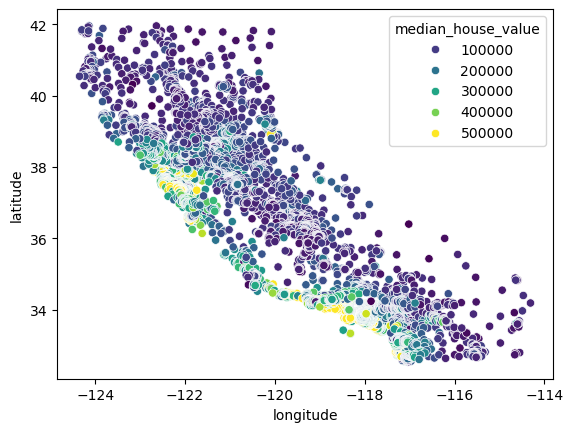

In [109]:
# Al scatterplot de la variable 'longitude' y 'latitude' añadimos la variable 'median_house_value' para ver como cambia el precio de las casas
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis')

<Axes: xlabel='ocean_proximity', ylabel='count'>

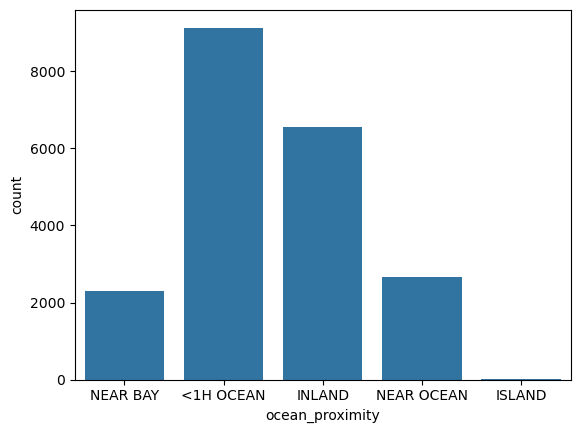

In [110]:
# Imprimimos un countplot de la variable 'ocean_proximity' 
sns.countplot(data=df, x='ocean_proximity')

<Axes: xlabel='ocean_proximity', ylabel='population'>

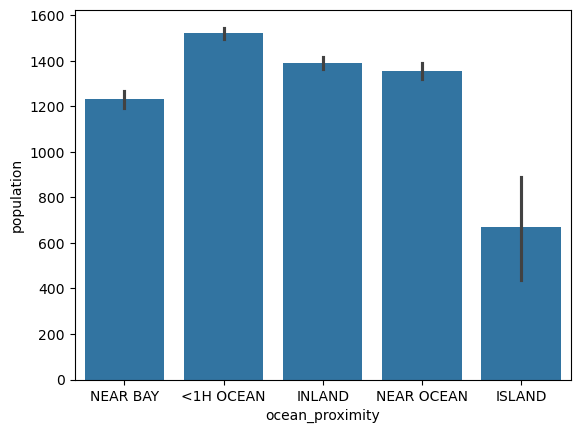

In [111]:
# Imprimimos un barplot de la variable 'ocean_proximity' y 'population' para ver la distribución de la poblacion segun la zona
sns.barplot(data=df, x='ocean_proximity', y='population', estimator=np.mean)


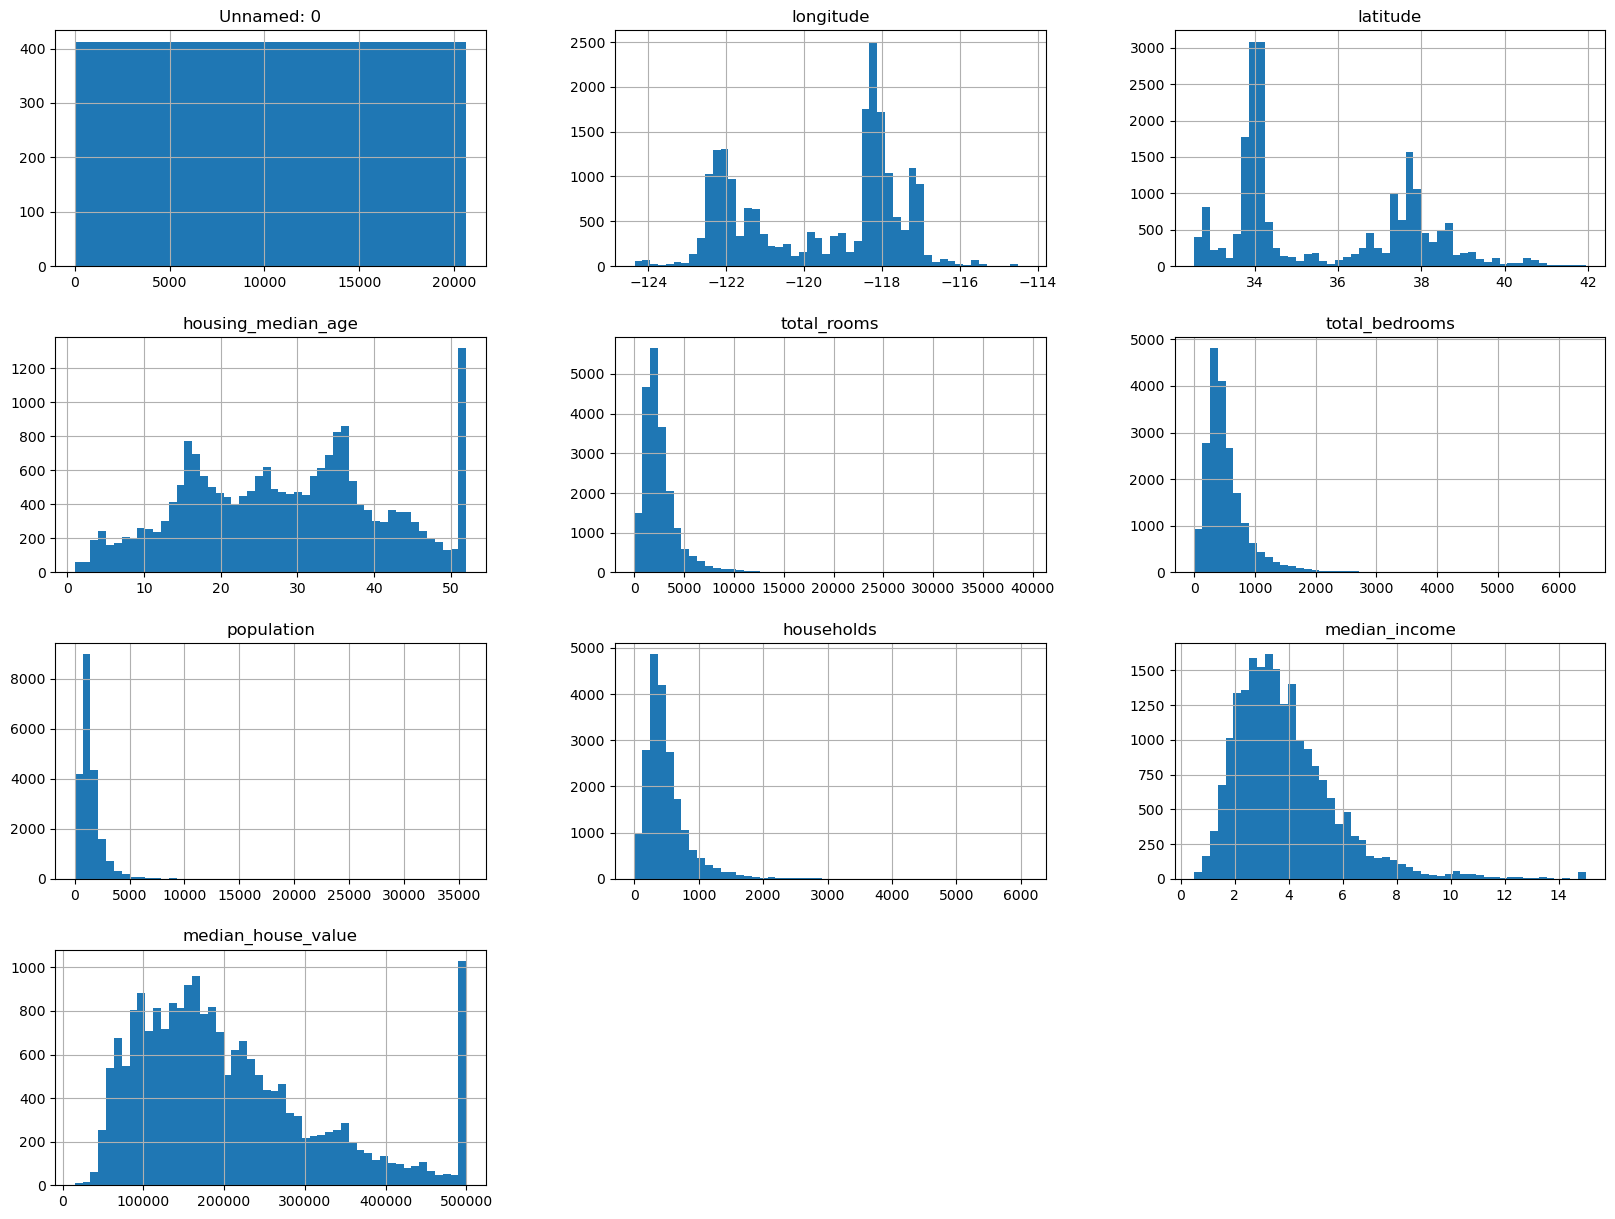

In [112]:
# Imprimimos un histograma de todas las variables para ver la distribución de los datos 
%matplotlib inline
df.hist(figsize=(20,15), bins=50)
plt.show()

In [113]:
# Dividimos el dataset en train y test

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

len(train_set), len(test_set)

(16512, 4128)

<Axes: >

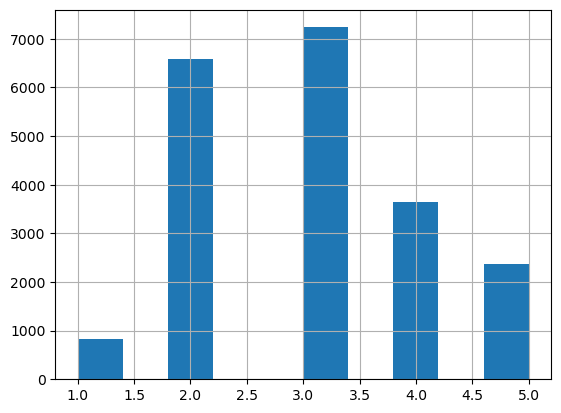

In [114]:
# Revisamos la distribución de la nueva variable 'income_cat' que separa el median_income en diferentes categorias
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

df['income_cat'].hist()

In [115]:
# Realizamos un split estratificado basado en las categorias de la variable 'income_cat'

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

len(strat_train_set), len(strat_test_set)

(16512, 4128)

In [116]:
# Revisamos la distribución de la nueva variable 'income_cat' que separa el median_income en diferentes categorias
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [117]:
# Eliminamos la variable 'income_cat' para regresar al dataset original
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [118]:
# Creamos una copia del dataset para trabajar
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

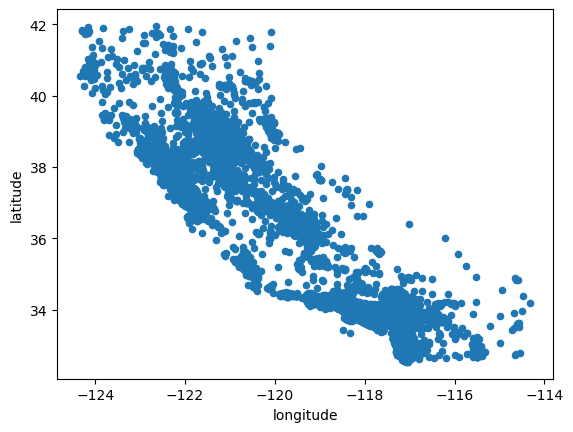

In [119]:
# Imprimimos un scatterplot de la variable 'longitude' y 'latitude'
df.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

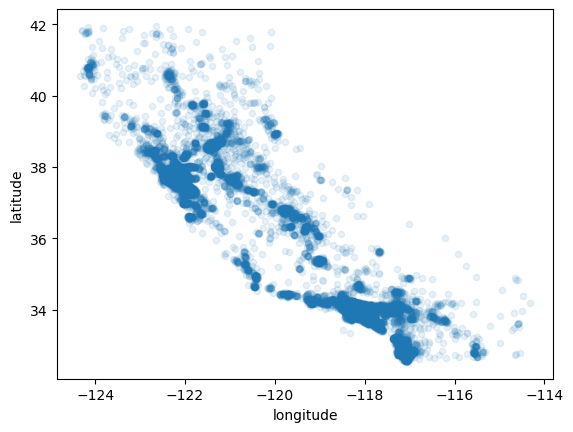

In [120]:
# Imprimimos un scatterplot de la variable 'longitude' y 'latitude' y le agregamos un 'alpha' para distinguir la densidad de los puntos
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

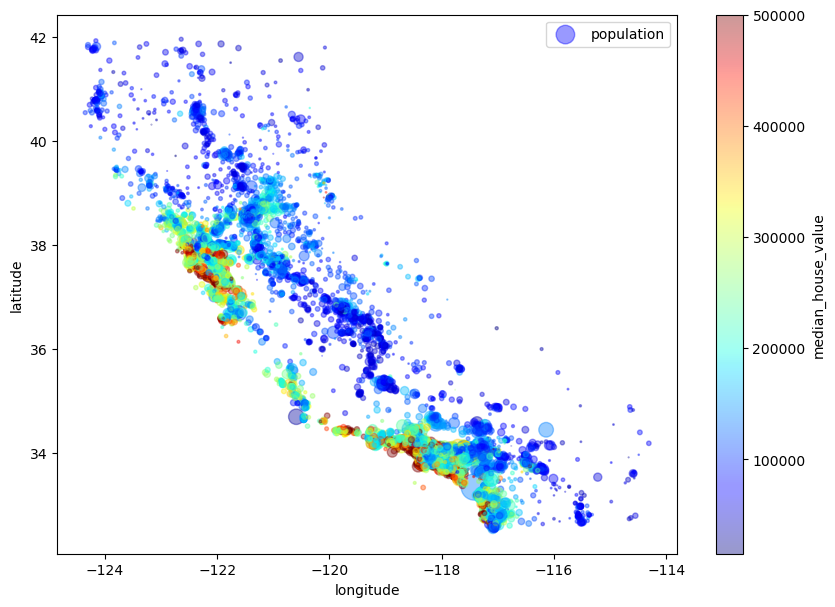

In [121]:
# Volvemos a imprimir un scatterplot de la variable 'longitude' y 'latitude' pero ahora agregando una separacion de color por la variable 'median_house_value' y un tamaño de 's' para la poblacion
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [122]:
# Creamos un dataframe sin la variable 'ocean_proximity' para calcular una matriz de correlaciones
df1 = strat_train_set.drop('ocean_proximity', axis=1)

corr_matrix = df1.corr()

In [123]:
# Imprimimos la matriz de correlaciones 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
Unnamed: 0            0.067805
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

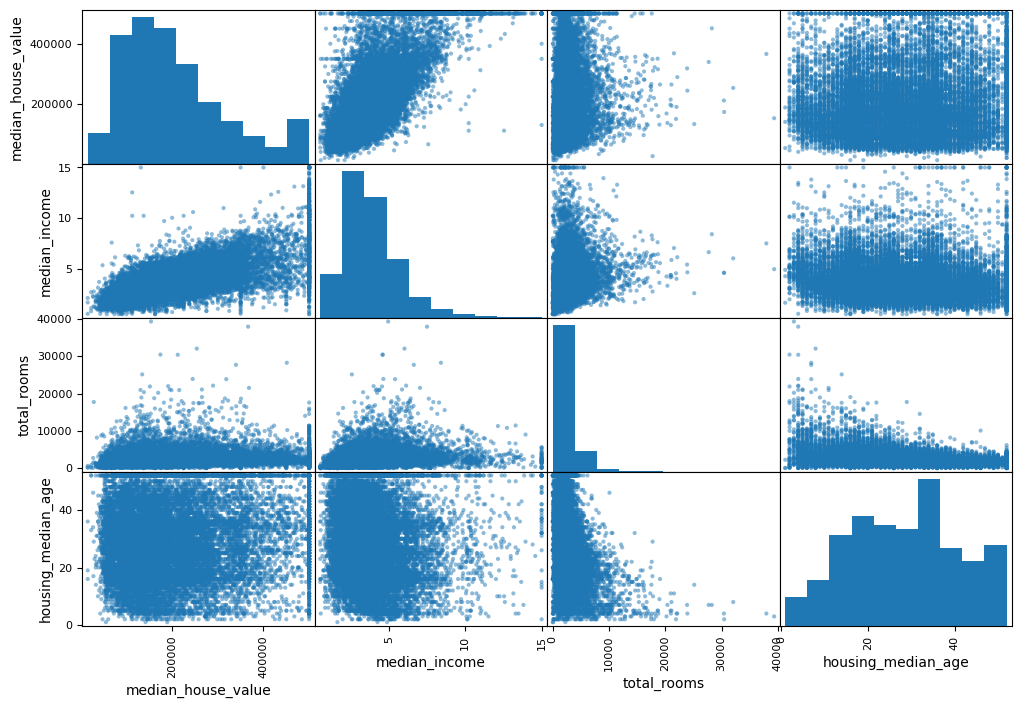

In [124]:
# Imprimimos un scatterplot de los atributos seleccionados, para ver la relacion entre ellos
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

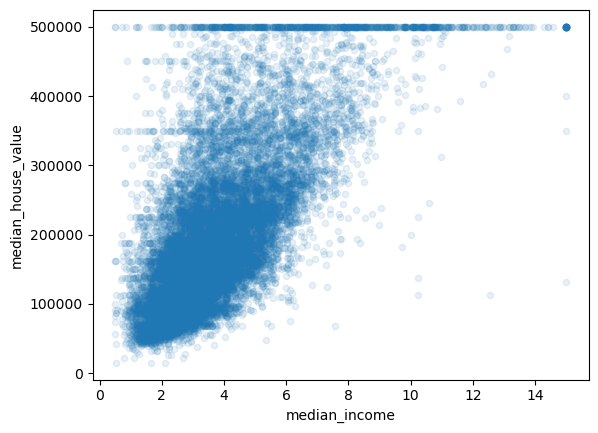

In [125]:
# Imprimimos un scatterplot de la variable 'median_income' y 'median_house_value' como lo habiamos visto antes
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [126]:
# Agregamos las variables 'rooms_per_household', 'population_per_household' y 'bedrooms_per_room' y calculamos las nuevas correlaciones
df1['rooms_per_household'] = df1['total_rooms']/df1['households']
df1['bedrooms_per_room'] = df1['total_bedrooms']/df1['total_rooms']
df1['population_per_household'] = df1['population']/df1['households']

corr_matrix = df1.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
Unnamed: 0                  0.067805
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

3.- Prepare the data for ML algorithms

En esta seccion, vamos a preparar nuestro dataset aplicando preprocesamiento de datos para tenerlo listo para entrenar en nuestro modelo

In [127]:
# Volvemos a nuestro dataset original y creamos un nuevo dataframe donde separamos la variable 'median_house_value' 
df = strat_train_set.drop('median_house_value', axis=1)
df_labels = strat_train_set['median_house_value'].copy()

In [128]:
# Llenamos los valores vacios de la variable 'total_bedrooms' con la mediana 
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

/var/folders/bs/2tfzn10x6jl89d57bc7g9kph0000gn/T/ipykernel_60957/3767615109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median, inplace=True)


In [129]:
# definimos un imputador para nuestros datos y como solo se pueden calcular datos numericos, creamos un datframe sin la variable 'ocean_proximity'
imputer = SimpleImputer(strategy='median')
df1 = df.drop('ocean_proximity', axis=1)

In [130]:
# Aplicamos el imputador para entrenarlo
imputer.fit(df1)

SimpleImputer(strategy='median')

In [131]:
# Imprimimos la mediana de cada variable
imputer.statistics_
df1.median().values

array([ 1.03395e+04, -1.18510e+02,  3.42600e+01,  2.90000e+01,
        2.11900e+03,  4.33000e+02,  1.16400e+03,  4.08000e+02,
        3.54155e+00])

In [132]:
# Aplicamos el imputador a nuestros datos vacios, esto nos regresa un array, lo convertimos a dataframe
X = imputer.transform(df1)
df_tr = pd.DataFrame(X, columns=df1.columns, index=df1.index)

In [133]:
# Imprimimos los primeros 5 datos de nuestro nuevo dataframe
df_tr.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,12655.0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,15502.0,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,2908.0,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,14053.0,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,20496.0,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [134]:
# Creamos un nuevo dataframe con la variable 'ocean_proximity' y lo codificamos con OneHotEncoder para convertirlo en una variable numerica
df_cat = df[['ocean_proximity']]
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [135]:
# Imprimimos el array
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [136]:
# Revisamos las categorias de nuestro array
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [148]:
# Creamos un pipeline para transformar nuestros datos y agregar nuevas variables, asi como aplicar un imputador para los datos vacios y un imputador para las variables numericas, para al final
# Regresar un dataframe listo para nuestro modelo

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attribs = attr_adder.transform(df.values)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

df1_tr = num_pipeline.fit_transform(df1)

num_attribs = list(df1)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

df_prepared = full_pipeline.fit_transform(df)
print(df_prepared)


# Se exporta el "full_pipeline" para su posterior uso
returned_path = dump(full_pipeline, "/Volumes/TOSHIBA EXT/Maestria/Programs/Machine Learning/End-to-End Housing/exports/full_pipeline.pkl")


[[ 0.38862581 -0.94135046  1.34743822 ...  0.          0.
   0.        ]
 [ 0.86480228  1.17178212 -1.19243966 ...  0.          0.
   1.        ]
 [-1.24161376  0.26758118 -0.1259716  ...  0.          0.
   0.        ]
 ...
 [ 1.4938503  -1.5707942   1.31001828 ...  0.          0.
   0.        ]
 [ 1.47327787 -1.56080303  1.2492109  ...  0.          0.
   0.        ]
 [ 1.57915062 -1.28105026  2.02567448 ...  0.          0.
   0.        ]]
stored pipeline in: ['/Volumes/TOSHIBA EXT/Maestria/Programs/Machine Learning/End-to-End Housing/exports/full_pipeline.pkl']


TypeError: expected str, bytes or os.PathLike object, not ColumnTransformer

4.- Select a model and train it. 

Para este ejemplo, se va a aplicar el modelo de regresion lineal para nuestro dataset convertido (df_prepared)


In [139]:
# Definimos un modelo de regresion lineal y lo entrenamos con nuestro dataset preparado y sus labels
lin_reg = LinearRegression( )
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [140]:
# Hacemos algunas predicciones y comparamos con los labels 
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [ 87601.25264261 303599.40299295 150469.99329512 189287.77736424
 254828.84887693]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [141]:
# Calculamos el error cuadratico medio 
housing_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68336.29740487998

In [142]:
# Hacemos un GridSearch para ver cuales son los mejores hiperparametros para nuestro modelo
param_grid = [
    {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'positive': [True, False],
        'n_jobs': [1, -1]
    }
]


grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(df_prepared, df_labels)


grid_best_params = grid_search.best_params_
print("Best parameters:", grid_best_params)

Best parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 611, in fit
    self.coef_ = 

In [143]:
# Hacemos un RandomSearch para ver cuales son los mejores hiperparametros para nuestro modelo
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [1, -1]
}

random_search = RandomizedSearchCV(lin_reg, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', return_train_score=True, random_state=42)

random_search.fit(df_prepared, df_labels)

best_params = random_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 611, in fit
    self.coef_ = 

In [144]:
# Entrenamos el modelo con los mejores hiperparametros encontrados y calculamos su error
final_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=False)
final_model.fit(df_prepared, df_labels)

housing_predictions = final_model.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68336.29740487998

In [145]:
# Exportamos el modelo para su posterior uso en otro programa
import os
import joblib
from joblib import dump
import pickle as pkl
model_folder = '/Volumes/TOSHIBA EXT/Maestria/Programs/Machine Learning/End-to-End Housing/exports'

df_prepared_path = os.path.join(model_folder, 'df_prepared.pkl')
pipeline_path = os.path.join(model_folder,'pipeline.pkl')
final_model_path = os.path.join(model_folder, 'model.pkl')

#dump(full_pipeline, pipeline_path)
dump(final_model, final_model_path)

#with open(pipeline_path, 'wb') as file:
 #   pkl.dump(full_pipeline, file)

with open(df_prepared_path, 'wb') as file:
    pkl.dump(df_prepared, file)